# Principal Component Analysis

# Diamensinality Reduction
First we will discuss about the Diamensinality Reduction in machine learning model. The main objectives of diamensinality reduction is to visulize the multidiamensinal data in to 2 Diamensinal (2D) data. Also to reduce the complexity of machine learning model by training model on less number of features. 

# PCA
To do this diamensinality reduction the one method we can use is principal component analysis (PCA). The converting multiple features to derived component is called as principal component analysis. The main problem with high diamention data in machine learning model is overfitting the model. 

# PCA Technique 
PCA is working on two techniques 
1. Defining the Number of principal components required that is by defining (n_components).
2. Defining how much information I want to retain. 

# Importing the Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [2]:
df=pd.read_csv('dermatology.csv',delimiter=",")
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [3]:
#Rename the columns 

df.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement',
              'scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis',
              'hyperkeratosis','parakeratosis','dlubbing of the rete ridges',
              'elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer',
              'vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes',
              'follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age (linear)', 'Classcode']

In [4]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [5]:
# Defining the target variable

y=df['Classcode']
del df['Classcode']

# Structure of dataset

In [6]:
df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.364384,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.760525,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [7]:
df.shape

(365, 34)

In [8]:
y.shape

(365,)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  365 non-null    int64 
 1   scaling                                   365 non-null    int64 
 2   definite borders                          365 non-null    int64 
 3   itching                                   365 non-null    int64 
 4   koebner phenomenon                        365 non-null    int64 
 5   polygonal papules                         365 non-null    int64 
 6   follicular papules                        365 non-null    int64 
 7   oral mucosal involvement                  365 non-null    int64 
 8   knee and elbow involvement                365 non-null    int64 
 9   scalp involvement                         365 non-null    int64 
 10  family history(0 or 1)                    365 non-

# Missing Values

In [10]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

# Dataset exploration

In [11]:
# Finding the unique features from target variable (Classcode)

unique_class=y.unique()
unique_class

array([1, 3, 2, 5, 4, 6], dtype=int64)

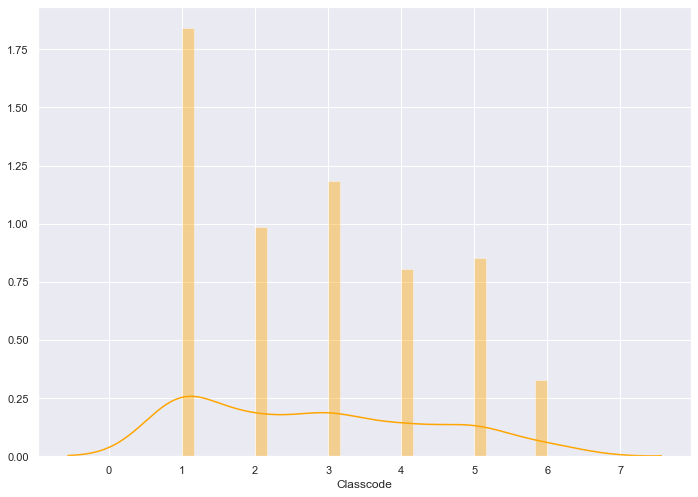

In [12]:
# Graphical representation of unique features from target variables. 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30,color='orange')
plt.show()

In [13]:
y.value_counts(ascending=False)

1    112
3     72
2     60
5     52
4     49
6     20
Name: Classcode, dtype: int64

# Cleaning Dataset

In [14]:
# As feature Age(Linear) is having integer data type but it shows the data type as object.
# We need to convert this in to integer data type. 
# First find the unique variables in that column.

df['Age (linear)'].unique()

array(['8', '26', '40', '45', '41', '18', '57', '22', '30', '20', '21',
       '10', '65', '38', '23', '17', '51', '42', '44', '33', '43', '50',
       '34', '?', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '55', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [15]:
# finding the shape of missing variable in Age column

df[df['Age (linear)']=='?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,?
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,?
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,?
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,?
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?


In [16]:
# Replace all that missing values with nan. 

df=df.replace('?',np.nan)
df[df['Age (linear)']=='?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)


In [17]:
df[df['Age (linear)'].isna()]

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,NaN
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,NaN
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,NaN
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN


In [19]:
# Converting the data type to integer

df['Age (linear)'] = pd.to_numeric(df['Age (linear)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  365 non-null    int64  
 1   scaling                                   365 non-null    int64  
 2   definite borders                          365 non-null    int64  
 3   itching                                   365 non-null    int64  
 4   koebner phenomenon                        365 non-null    int64  
 5   polygonal papules                         365 non-null    int64  
 6   follicular papules                        365 non-null    int64  
 7   oral mucosal involvement                  365 non-null    int64  
 8   knee and elbow involvement                365 non-null    int64  
 9   scalp involvement                         365 non-null    int64  
 10  family history(0 or 1)                

In [21]:
df['Age (linear)'].fillna(df['Age (linear)'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  365 non-null    int64  
 1   scaling                                   365 non-null    int64  
 2   definite borders                          365 non-null    int64  
 3   itching                                   365 non-null    int64  
 4   koebner phenomenon                        365 non-null    int64  
 5   polygonal papules                         365 non-null    int64  
 6   follicular papules                        365 non-null    int64  
 7   oral mucosal involvement                  365 non-null    int64  
 8   knee and elbow involvement                365 non-null    int64  
 9   scalp involvement                         365 non-null    int64  
 10  family history(0 or 1)                

In [23]:
# Finding the correletion between the features. 

df_corr=df.copy()
df_corr['Age (linear)']=y
df_corr.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
2,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
3,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,2


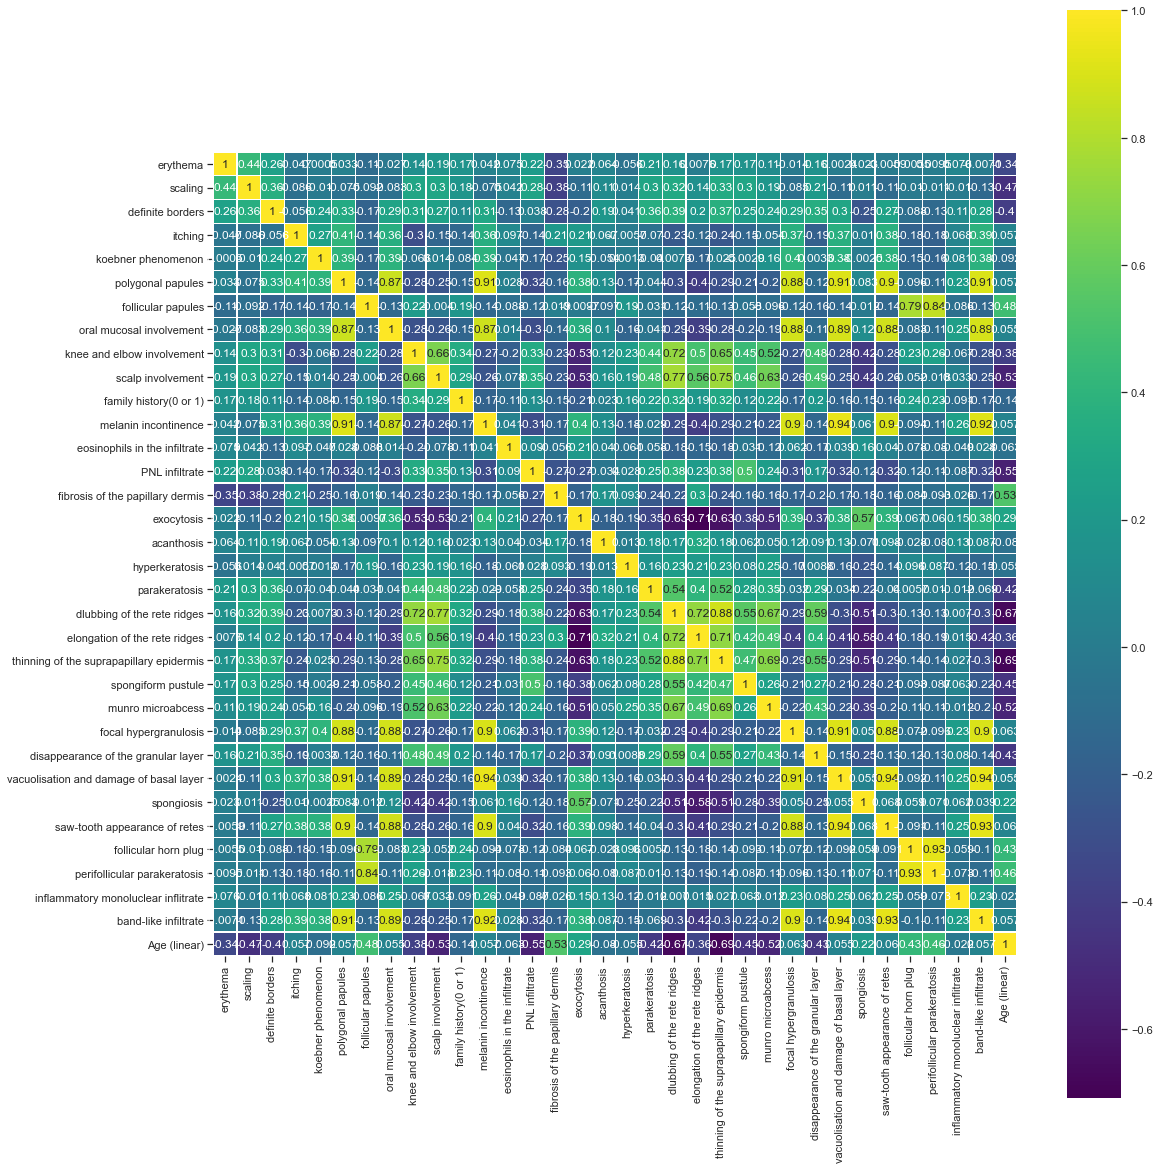

In [24]:
#Use the seaborn library for the heat map

sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 20))
sns.heatmap(df_corr.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

# Principal Complonent Analysis 

In [25]:
x=df.iloc[:,0:34]
y=y

In [26]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(x)
df_scaled

array([[ 1.40130251,  1.71856645,  1.60039684, ..., -1.19843846,
        -0.50307665, -1.86748224],
       [-0.10303695, -1.13269152,  0.4940619 , ...,  0.18146702,
         2.21056341, -0.67731653],
       [-0.10303695,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665,  0.24836791],
       ...,
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  0.18146702,
         2.21056341, -0.54507589],
       [-0.10303695, -1.13269152,  1.60039684, ...,  0.18146702,
         2.21056341,  0.90957109],
       [ 1.40130251,  0.29293746,  0.4940619 , ...,  1.56137251,
        -0.50307665, -0.08223367]])

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Method 1: By defining the number of component

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [29]:
# Dataframe with principal component 

df_principal = pd.DataFrame(data = principalComponents
             , columns = ['1st principal','2nd principal'])

In [31]:
df = pd.concat([df_principal, y], axis = 1)
df.head()

,1st principal,2nd principal,Classcode
0,-3.175427,1.967773,1
1,5.234603,2.085009,3
2,-4.464604,2.839477,1
3,4.770307,2.892076,3
4,-0.185524,-1.391574,2


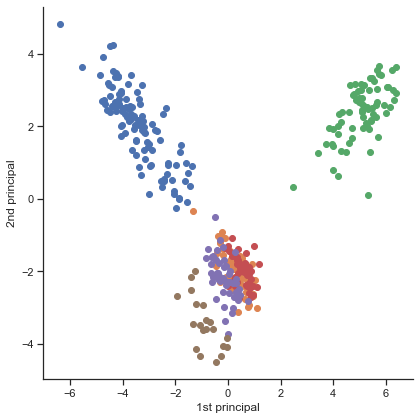

In [32]:
sns.FacetGrid(df, hue="Classcode", height=6).map(plt.scatter, '1st principal', '2nd principal')
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.27206076, 0.16102027])

# Machine Leaning Model

# Random Forest Classifier

This is a supervised learning algorithm. We can use this algoritham for classification and regression. It is also the most flexible and easy to use algorithm. The forest is comprised of number of trees. If we get the more number of trees it has, the more robust a forest. 
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

# Working

1. Select the samples ramdomly from given dataset
2. Construction fo decision tree for each component and also predict the results
3. Perform the vote for each predicted results.
3. Select the final prediction based on votes.


In [35]:
# Spliting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['1st principal','2nd principal']], y, test_size=0.3, random_state=1)

In [36]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(255, 2) (255,)
(110, 2) (110,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7909090909090909

# END